In [11]:
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Prepare a model for glass classification using KNN

In [12]:
glass=pd.read_csv('glass.csv')
glass.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [13]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [14]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [15]:
glass.duplicated().shape

(214,)

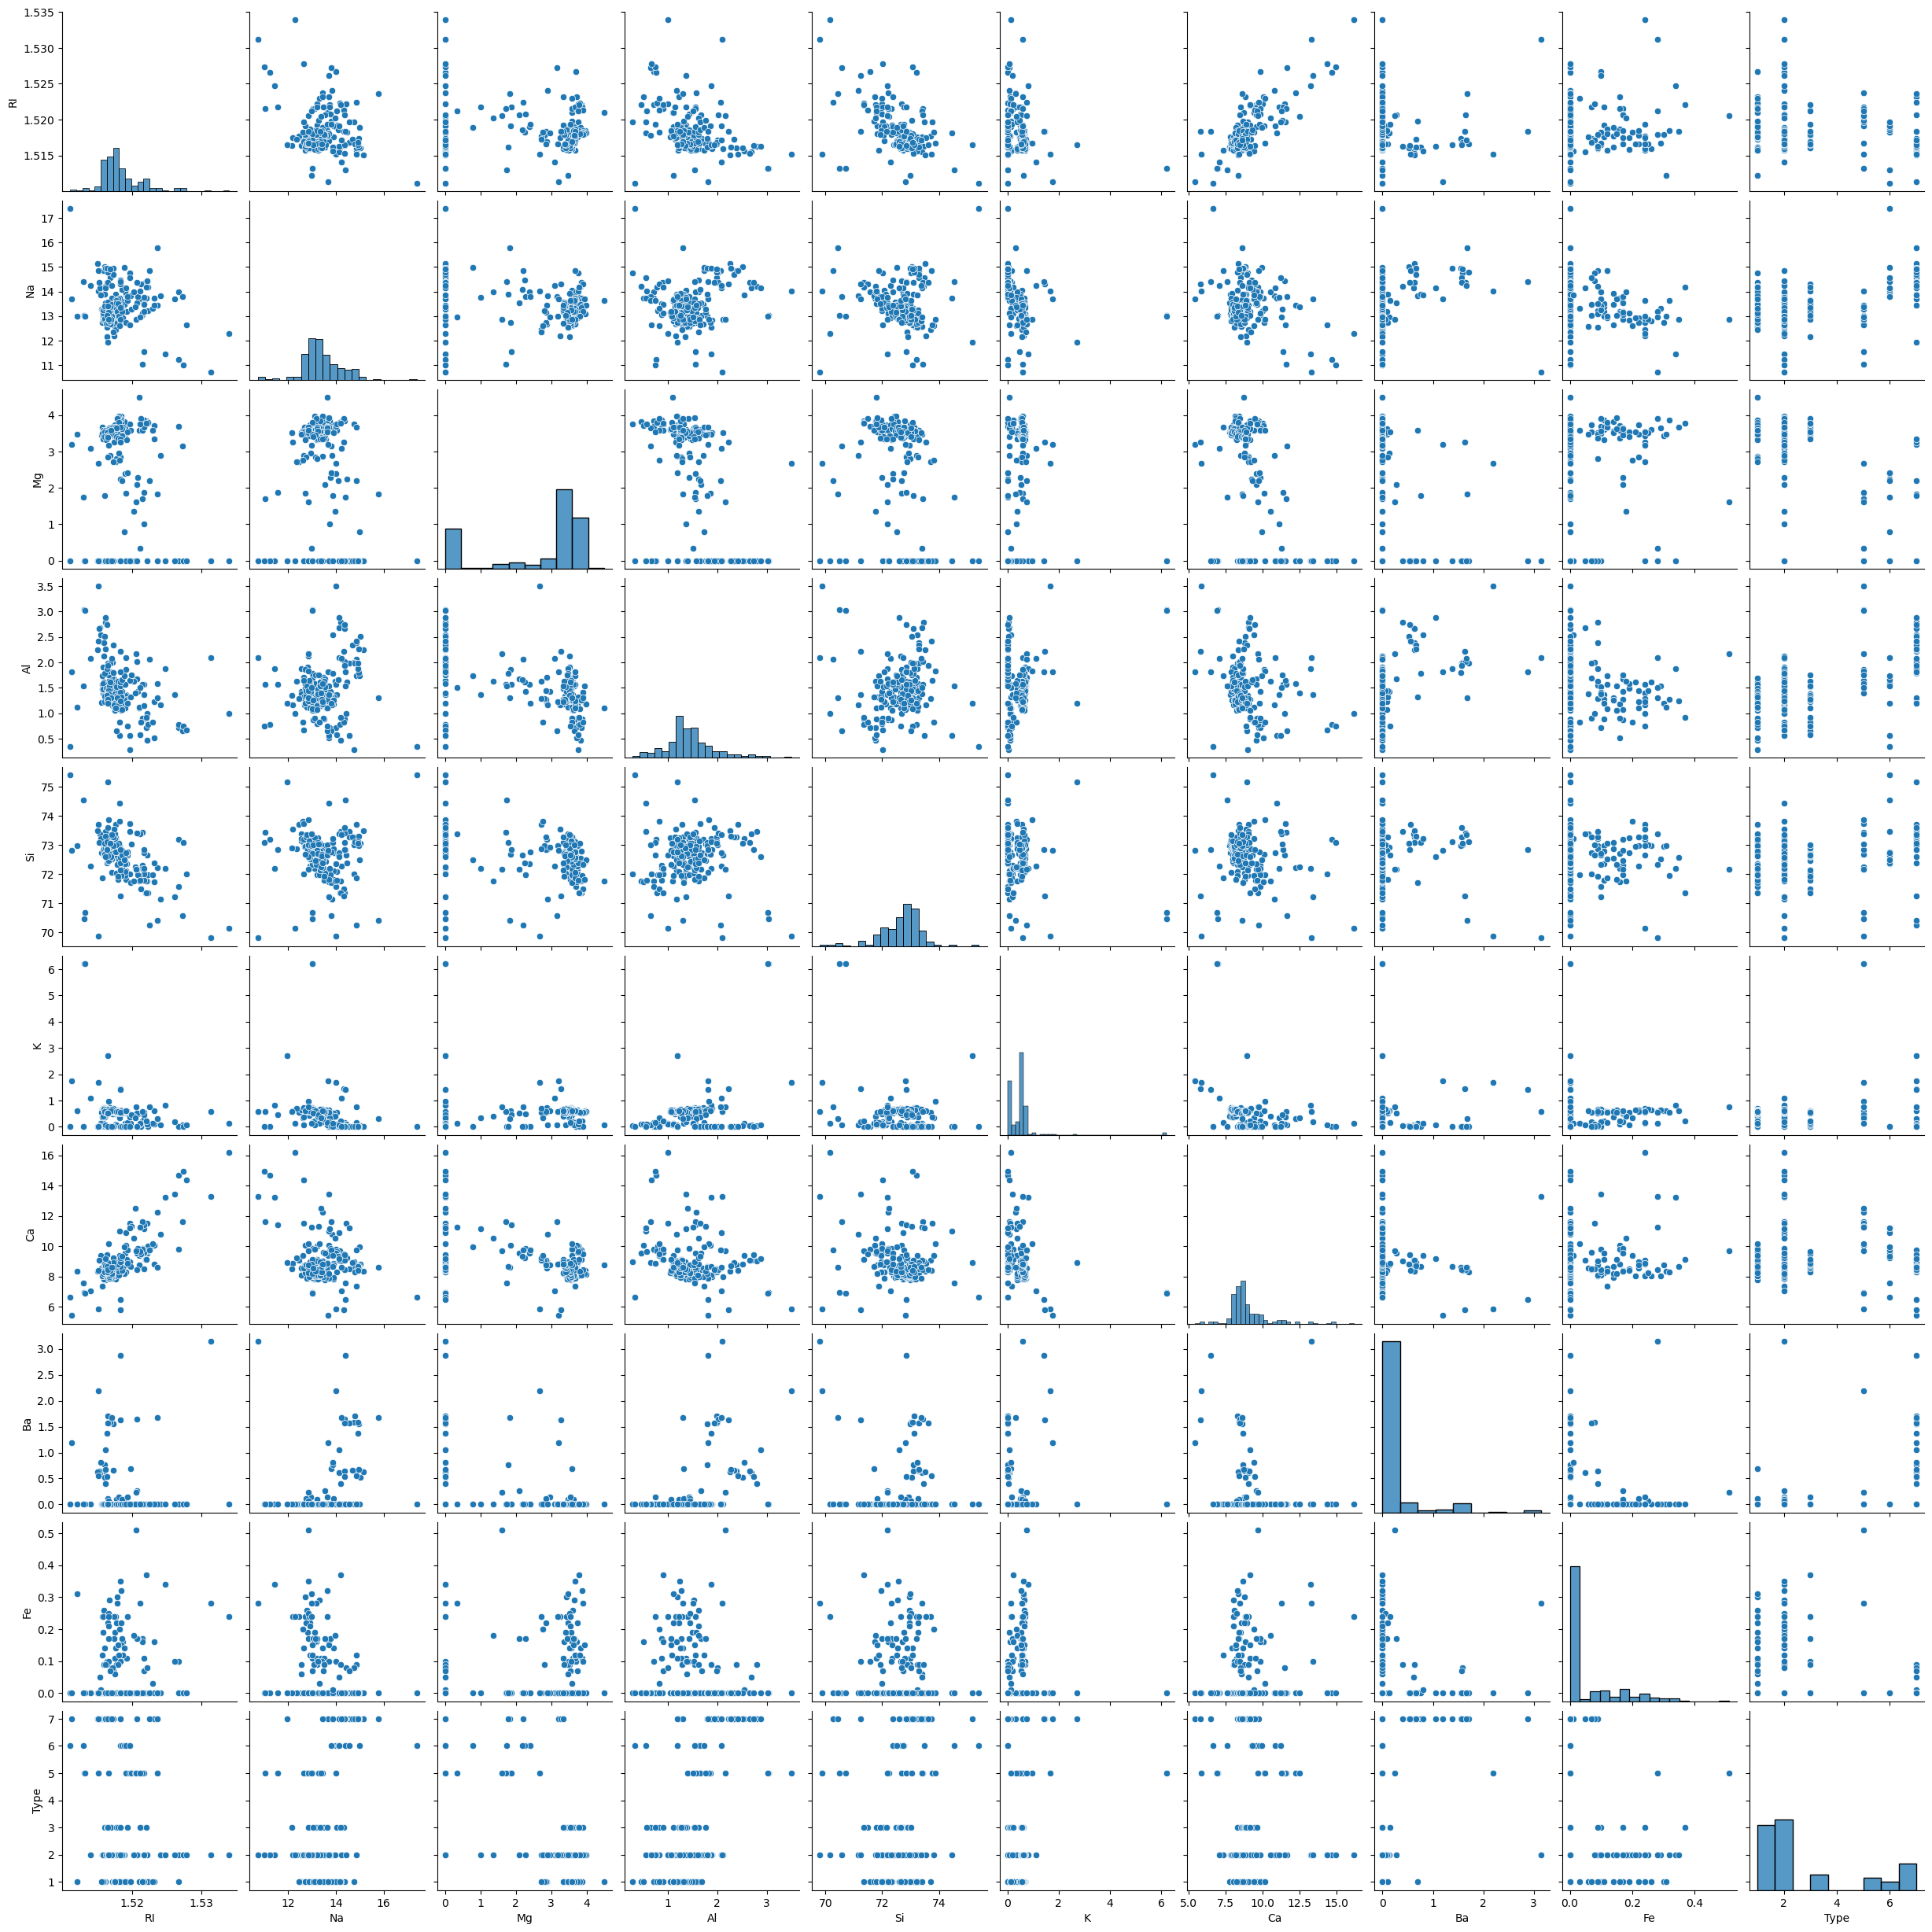

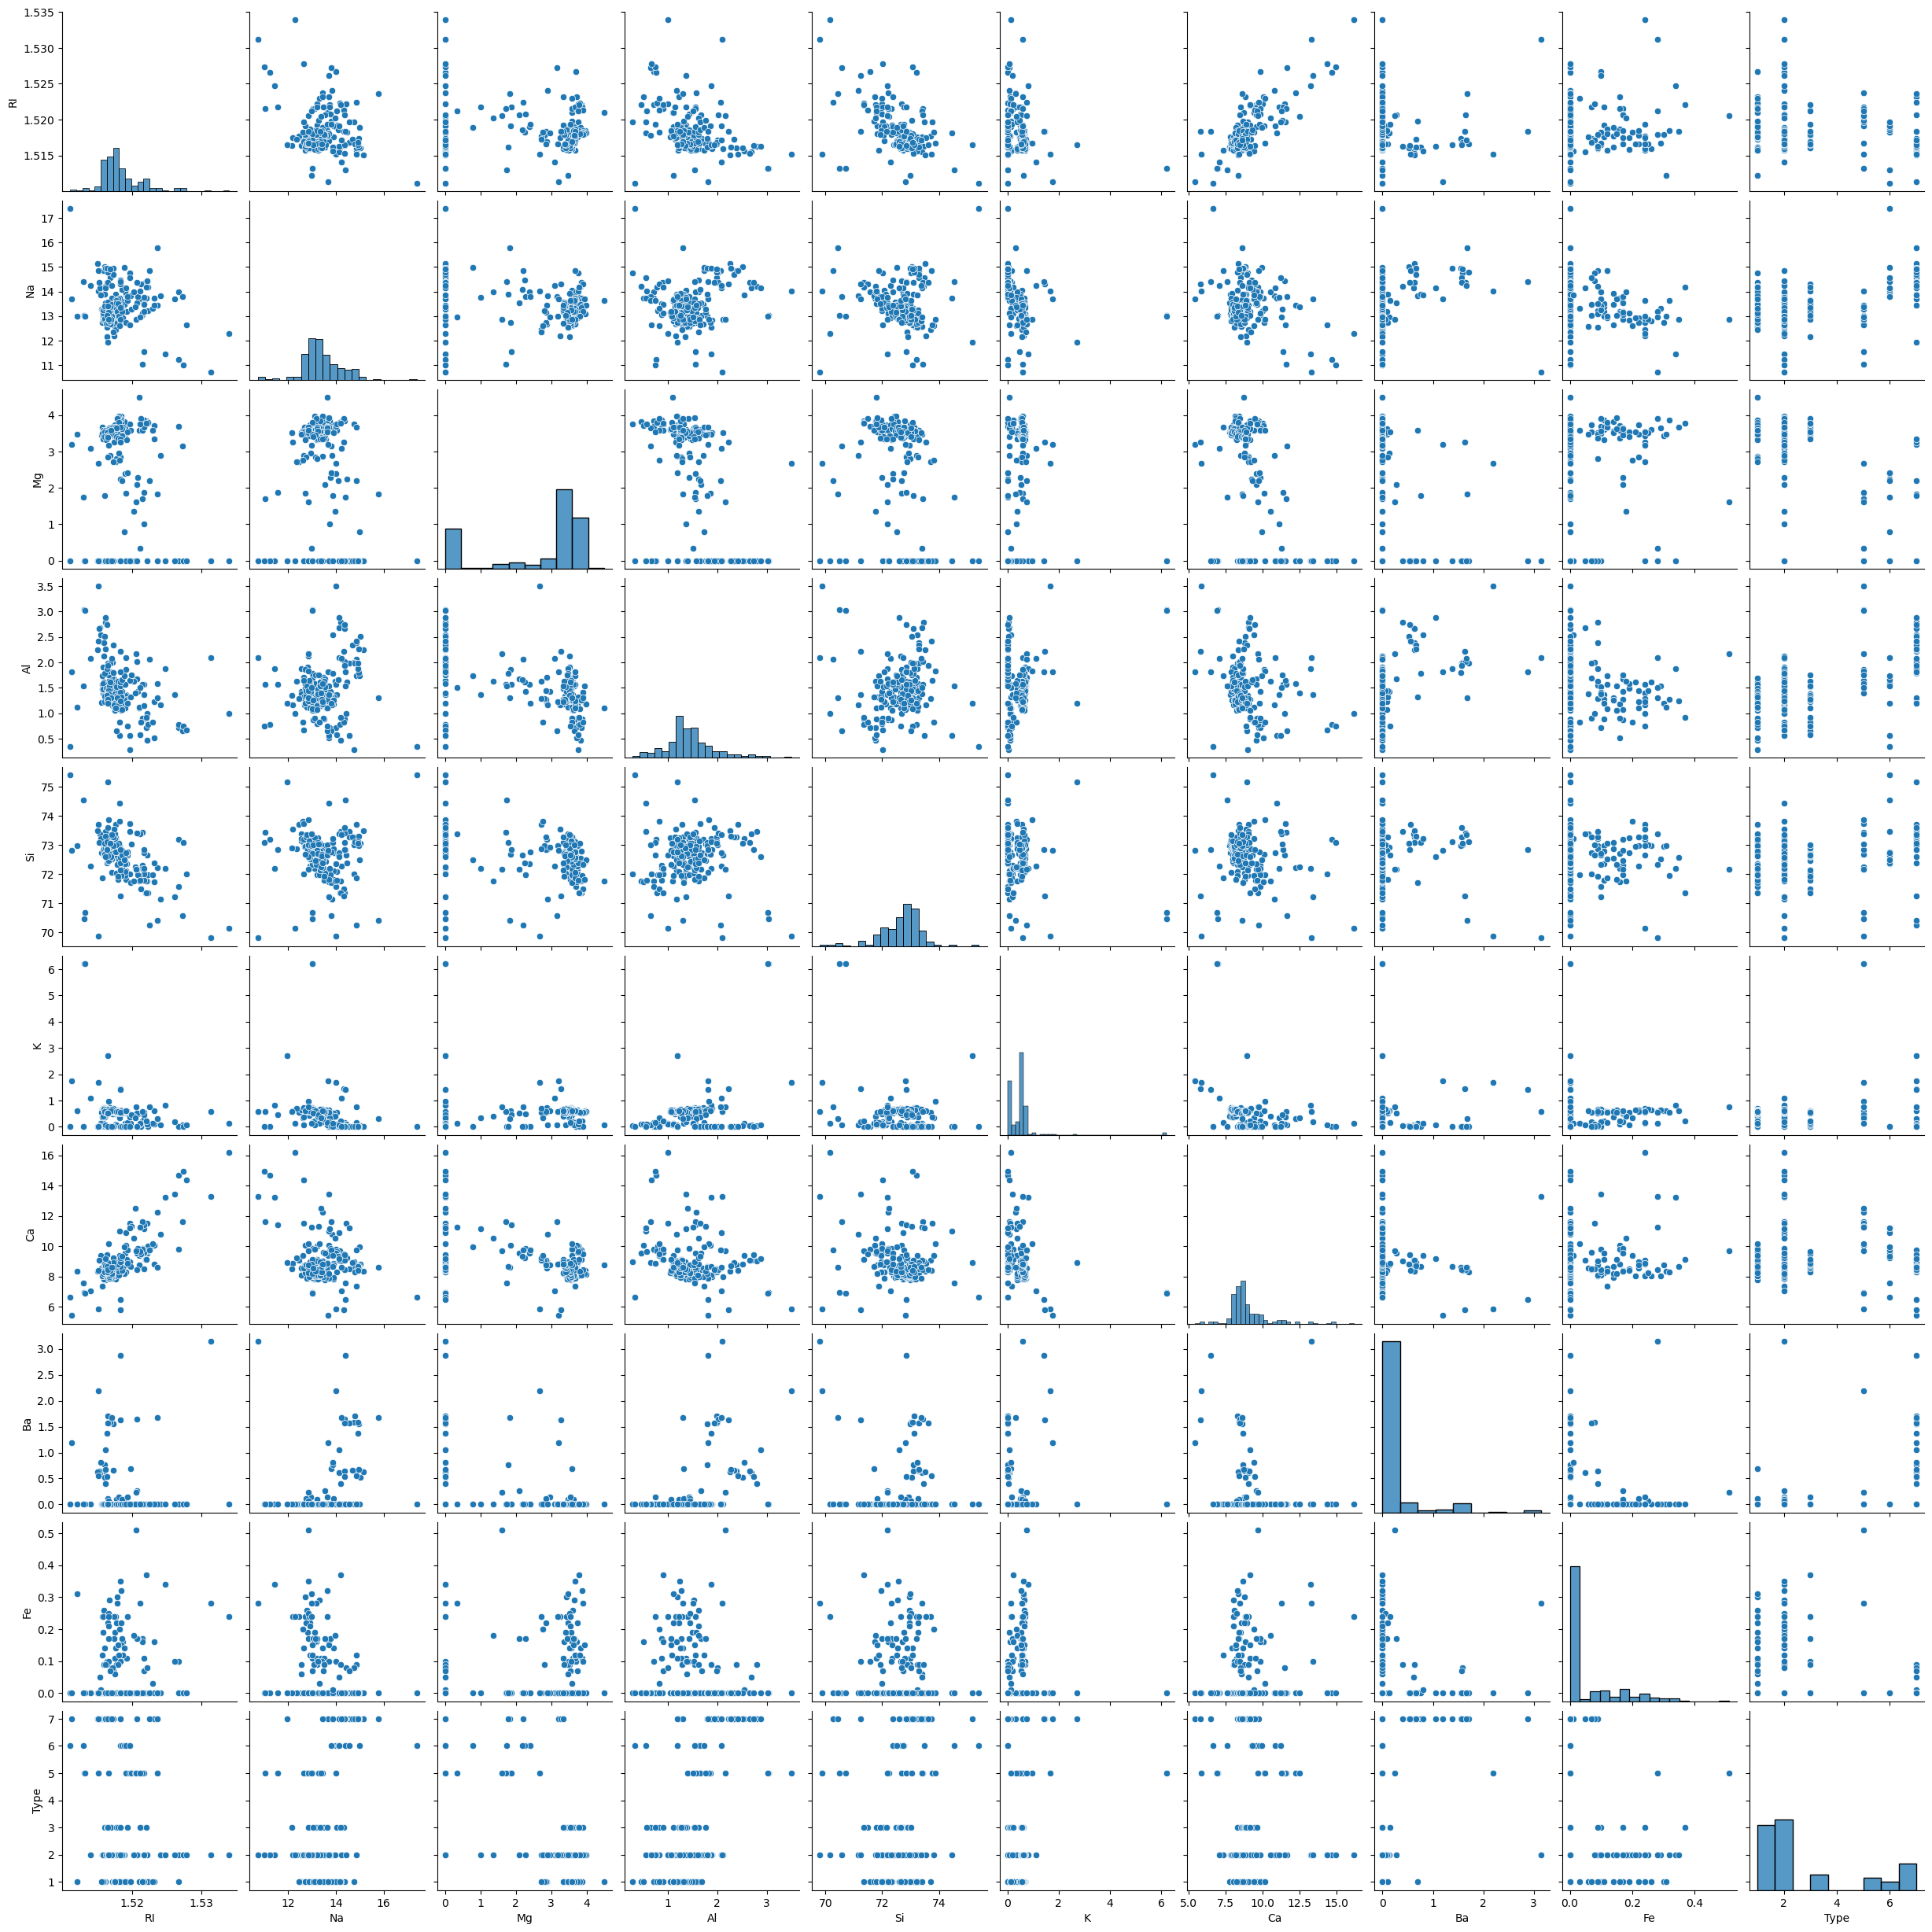

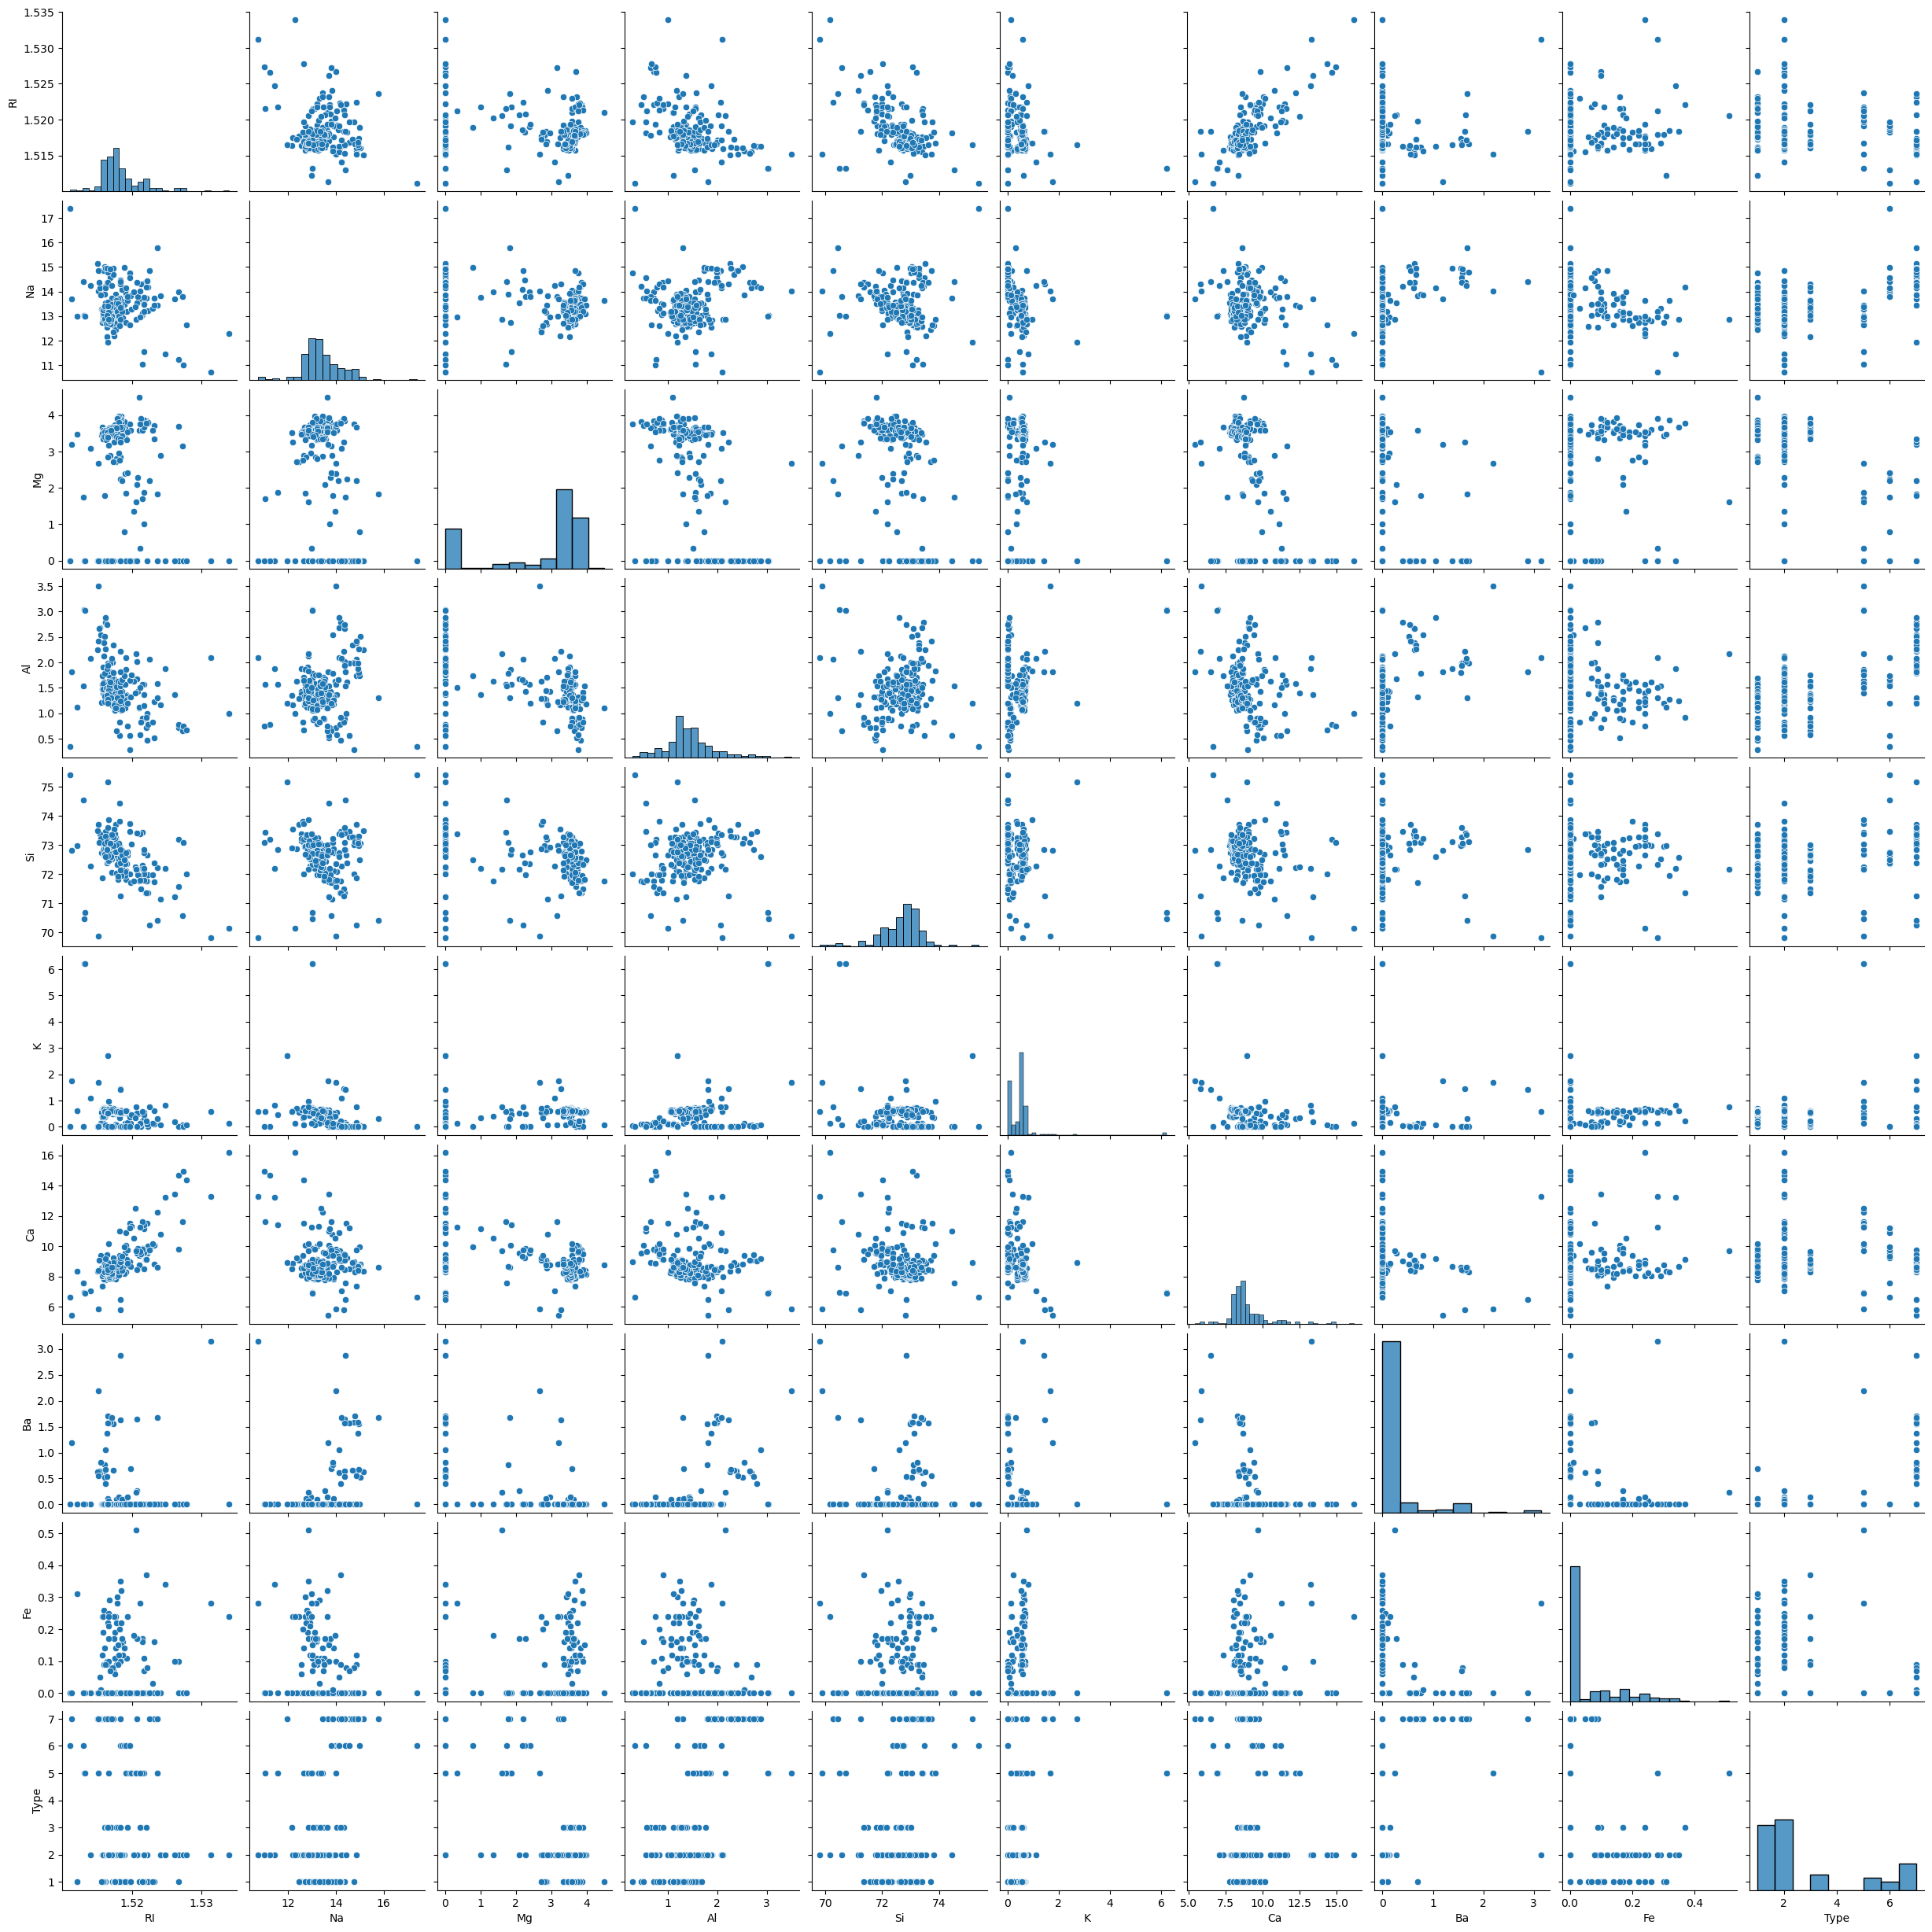

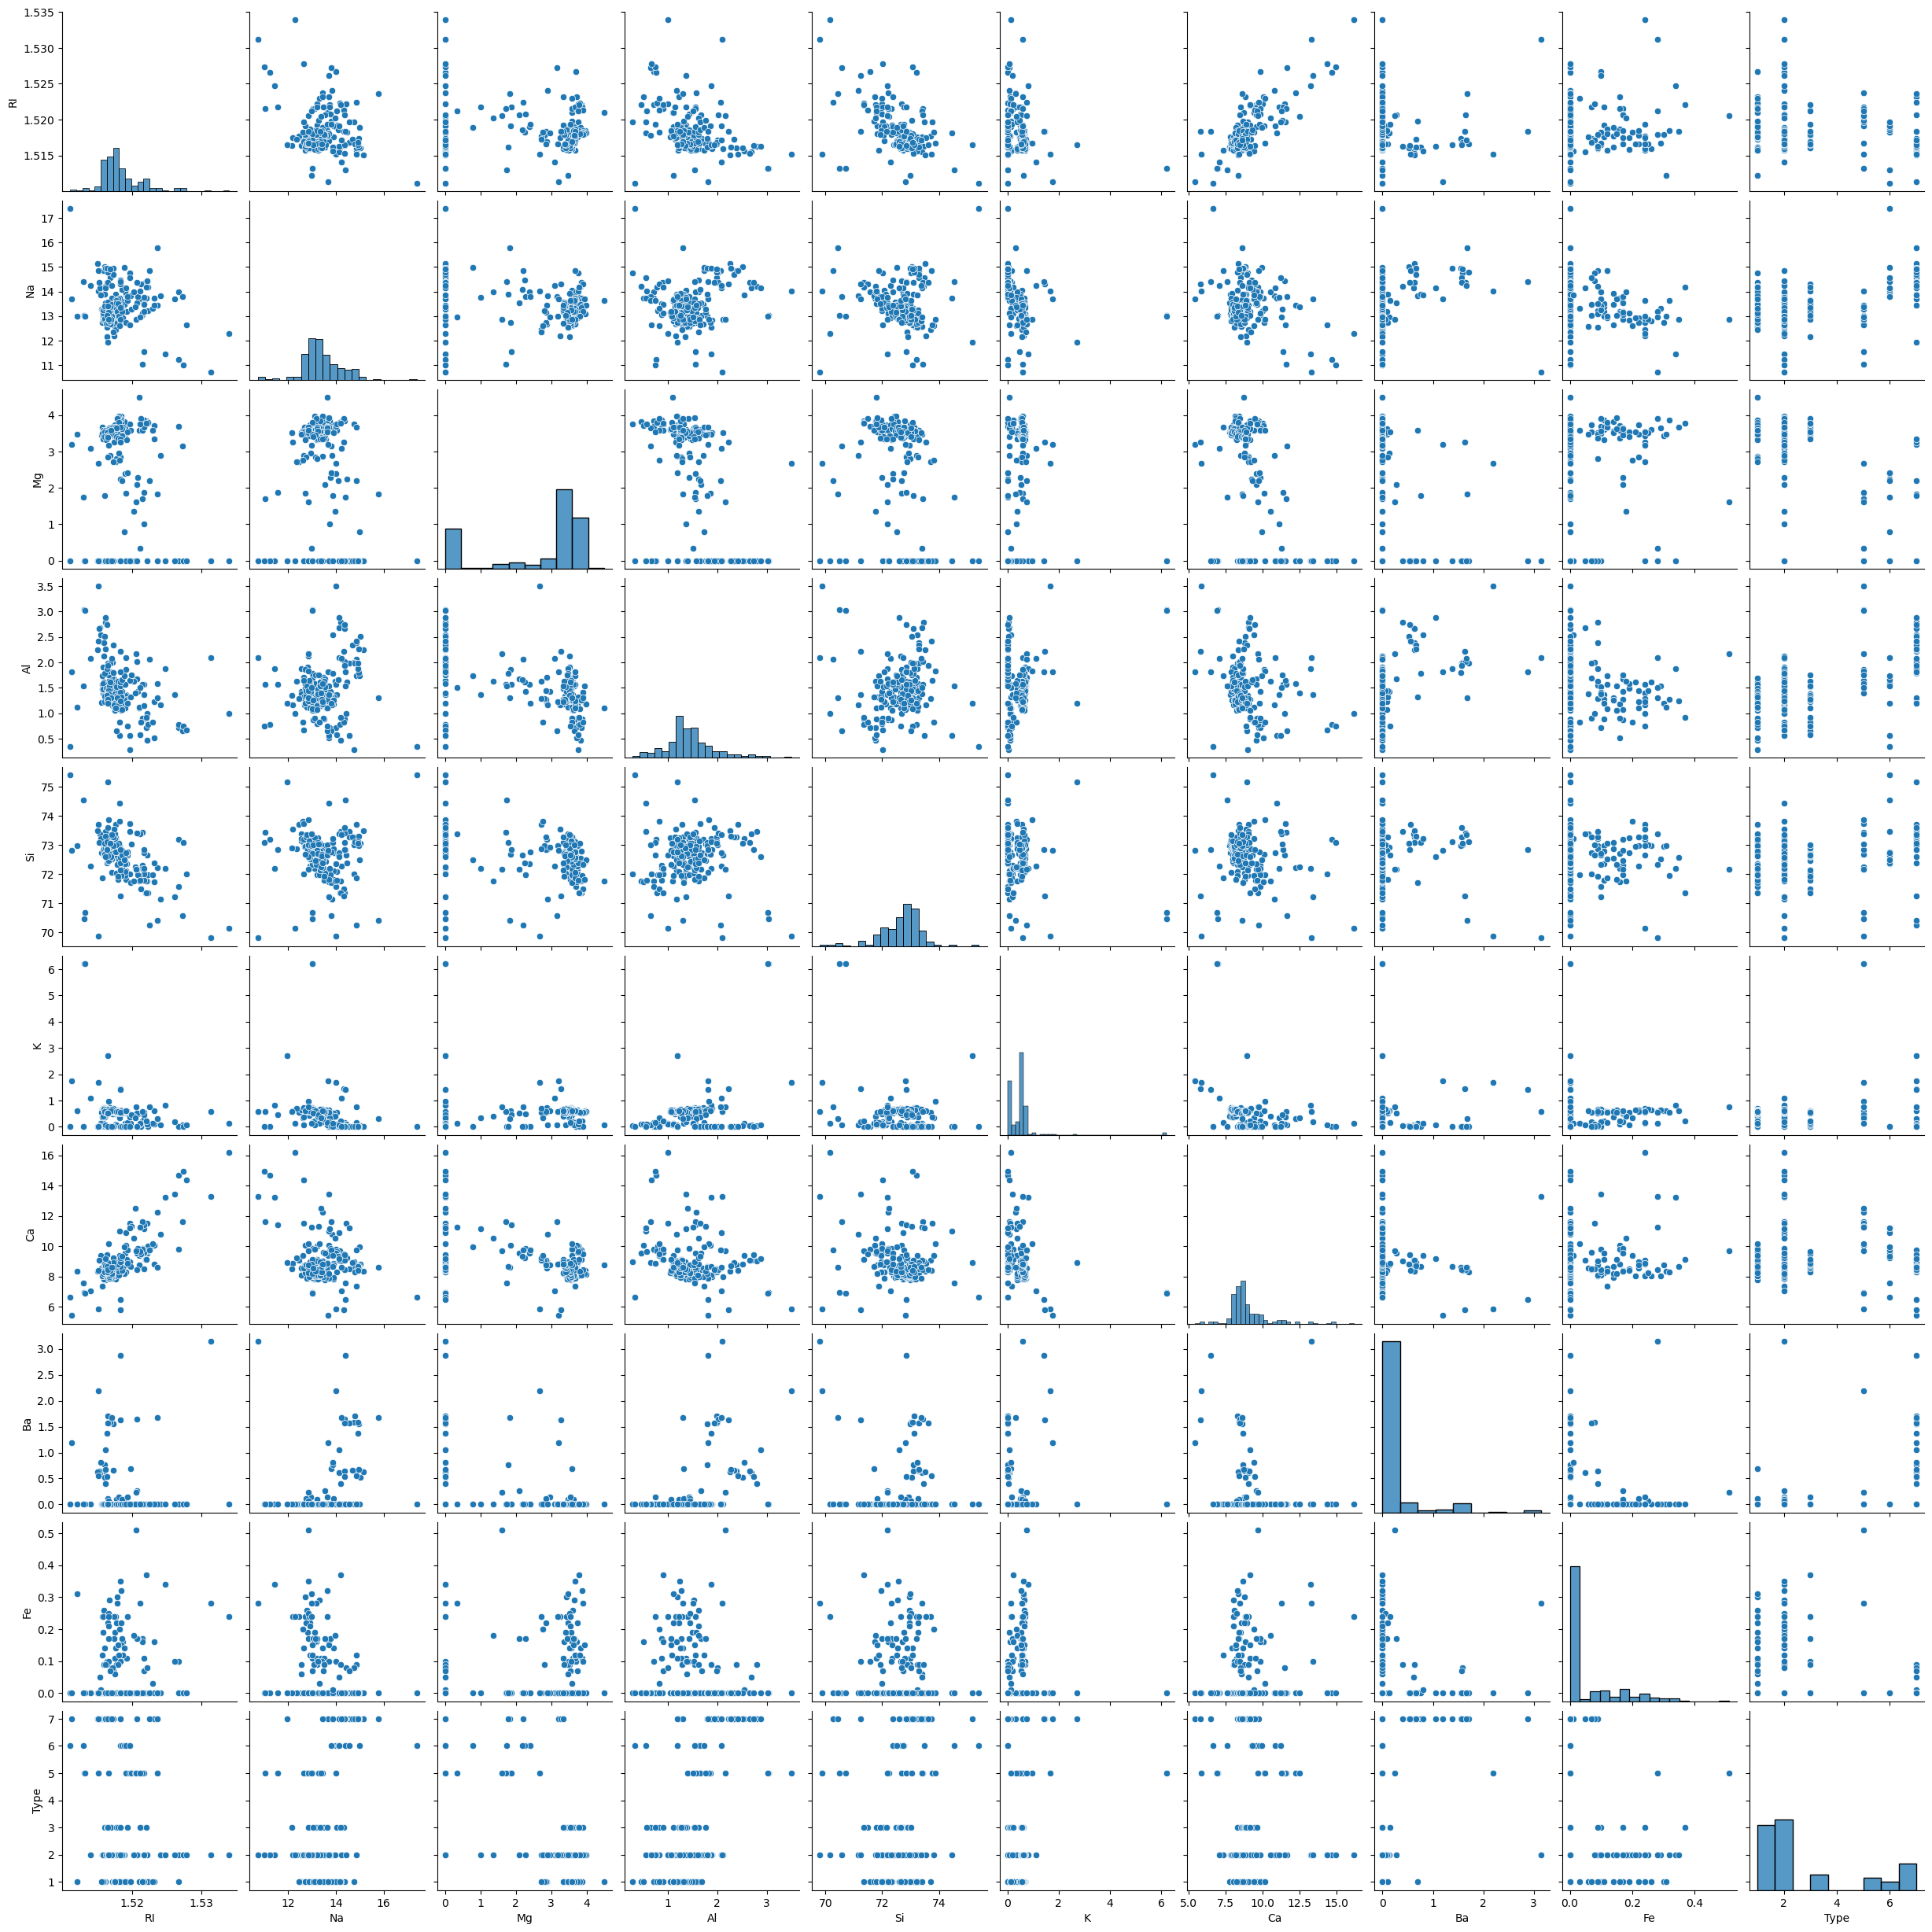

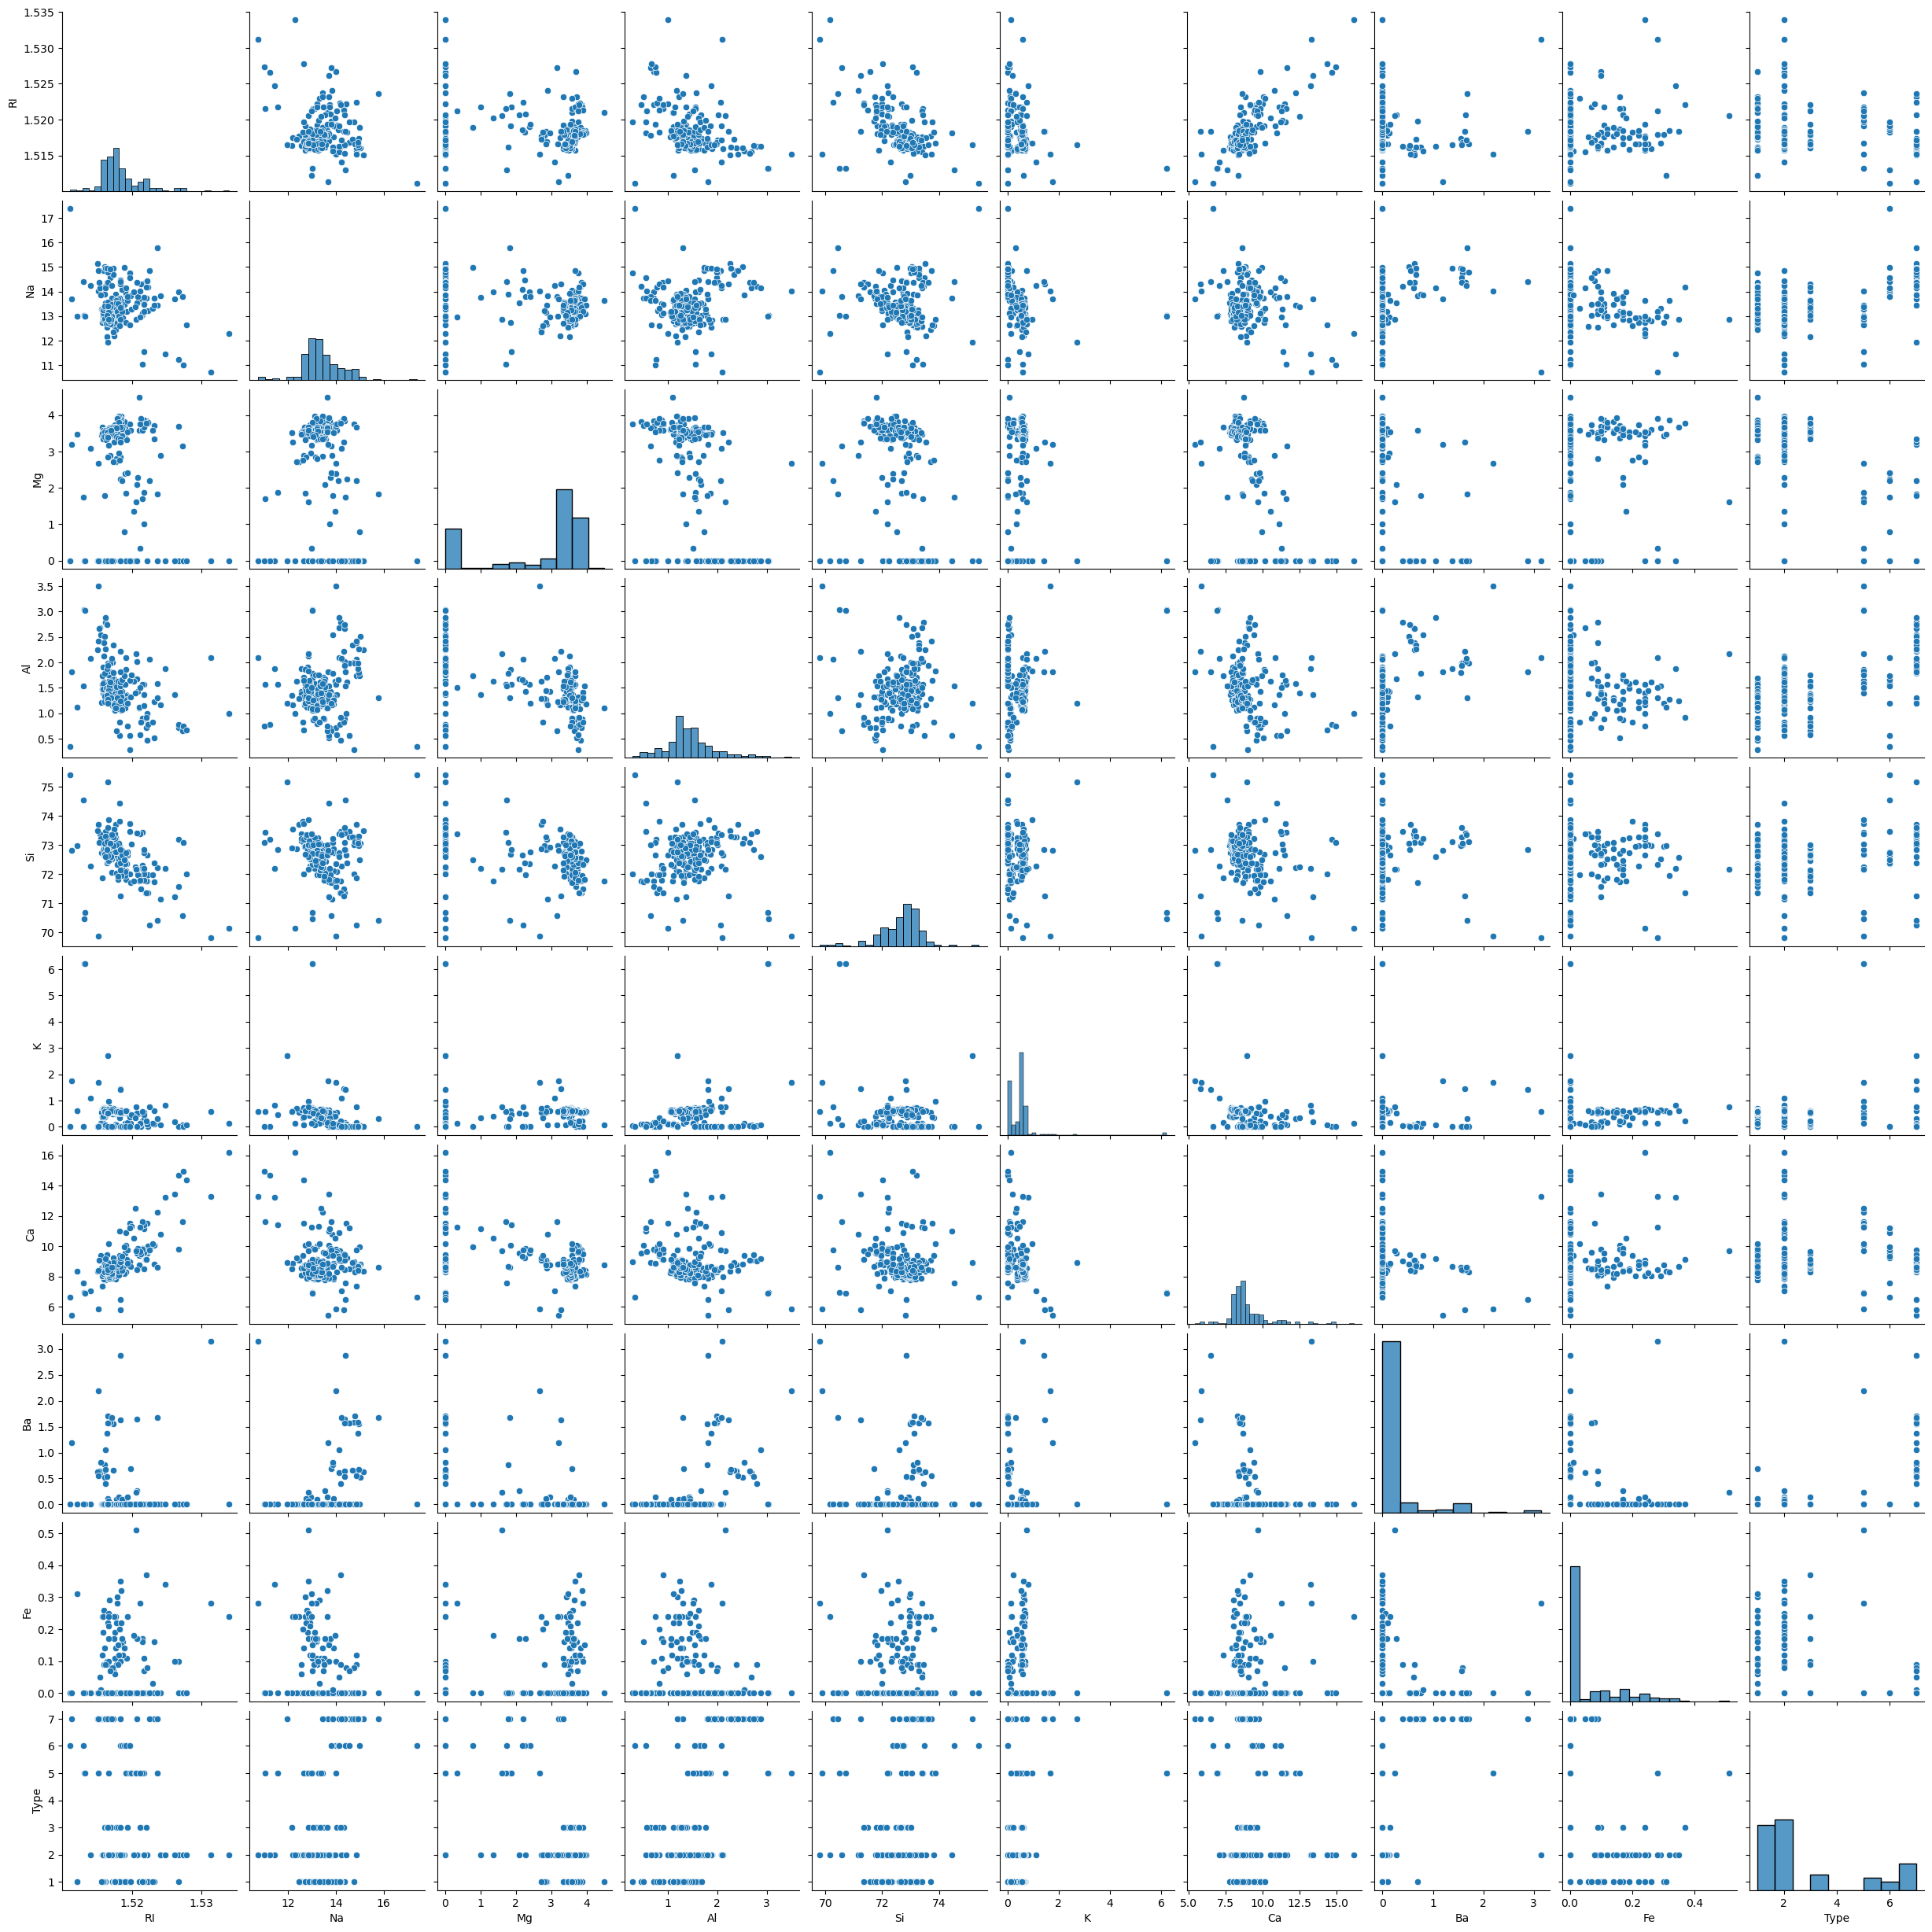

In [22]:
import seaborn as sns
sns.pairplot(glass)
plt.show()

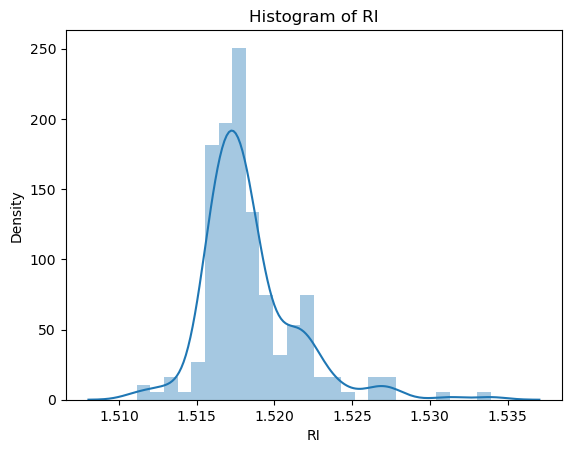

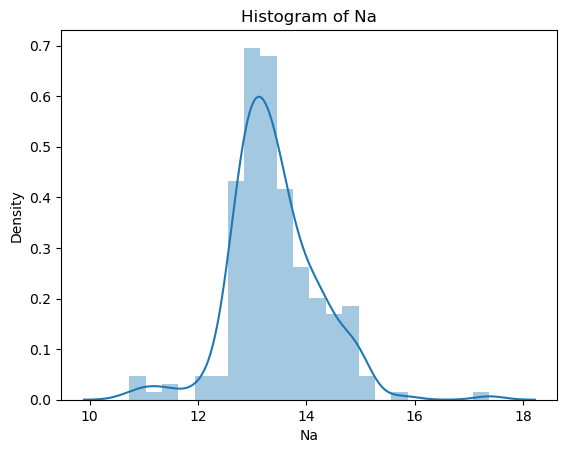

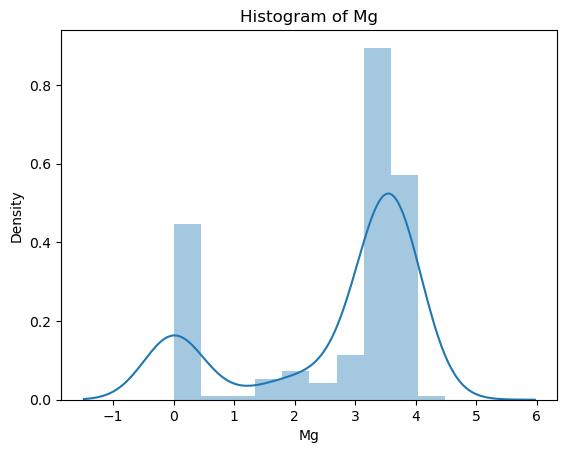

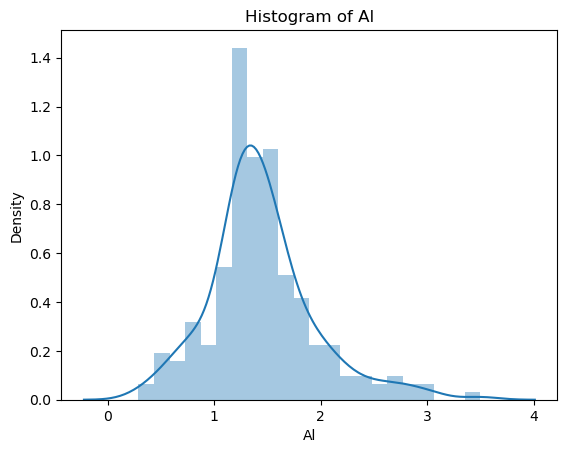

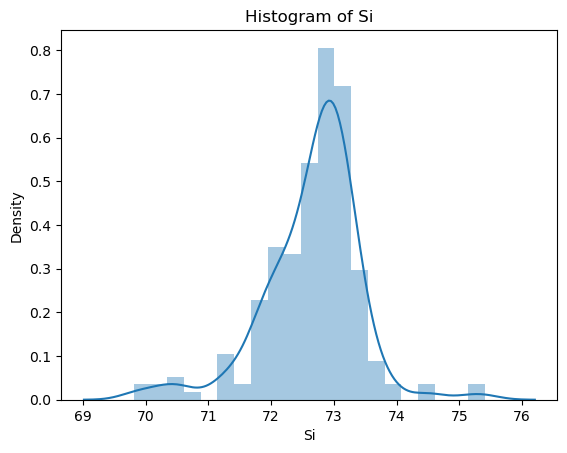

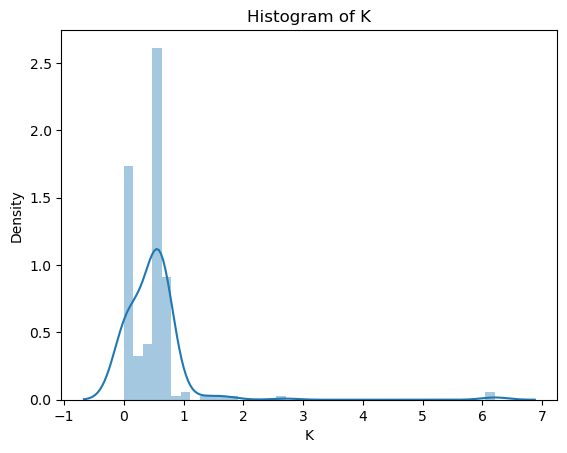

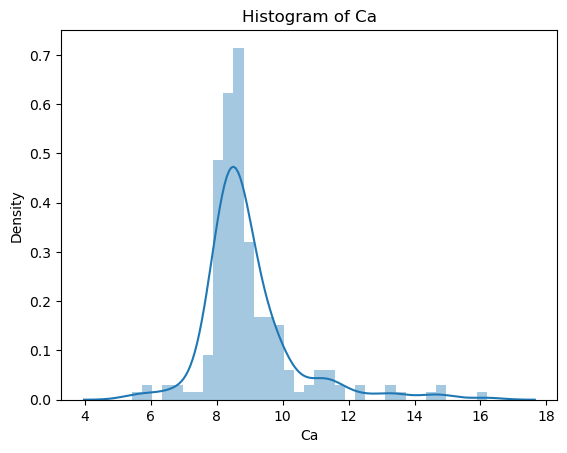

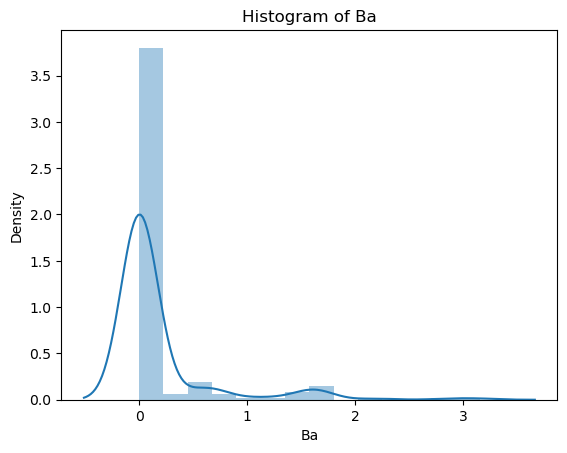

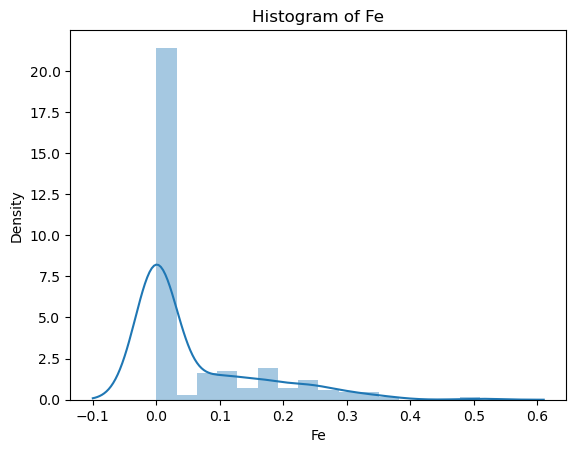

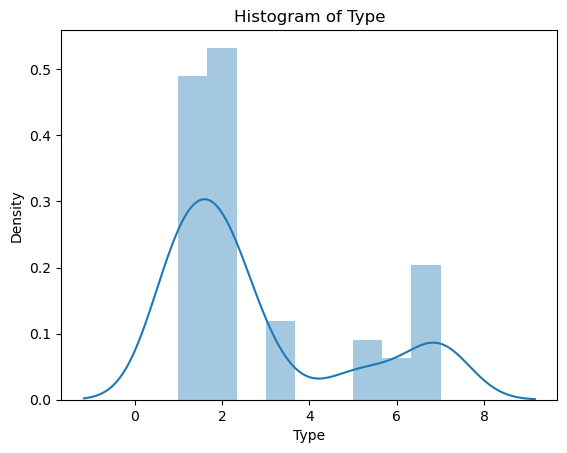

In [56]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
# Loop through each column in the DataFrame
for column in glass.columns:
    if glass[column].dtype == 'int64' or glass[column].dtype == 'float64': #or  companydata[column].dtype == 'int32':
        # Plot the bar plot
        sns.distplot(glass[column])
        # Add labels and a title to the plot
        plt.xlabel(column)
        plt.title('Histogram of ' + column)
        plt.show()
    else:
        plt.bar(glass[column].unique(),glass[column].value_counts())
        # Add labels and a title to the plot
        plt.xlabel(column)
        plt.xticks(companydata[column].unique())
        plt.title('barplot of ' + column)
        # Show the plot
        plt.show()

In [24]:
X=glass.iloc[:,0:-1]
Y=glass.iloc[:,-1]
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [26]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


In [28]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=12)

In [30]:
import warnings
warnings.filterwarnings('ignore')
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(pred,y_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.72      0.78      0.75        23
           2       0.67      0.67      0.67        21
           3       0.00      0.00      0.00         2
           5       0.25      0.50      0.33         2
           6       1.00      0.40      0.57         5
           7       0.77      0.83      0.80        12

    accuracy                           0.69        65
   macro avg       0.57      0.53      0.52        65
weighted avg       0.70      0.69      0.68        65



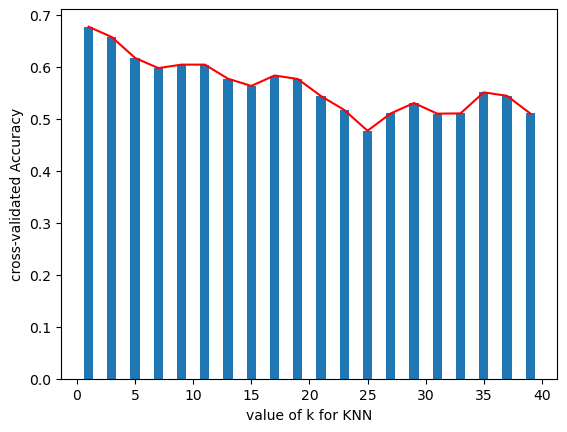

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range=[2*i+1 for i in range(0,20)]
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_train,y_train,cv=10)
    k_scores.append(scores.mean())    
plt.bar(k_range,k_scores)
plt.plot(k_range,k_scores,color='red')
plt.xlabel('value of k for KNN')
plt.ylabel('cross-validated Accuracy')
plt.show()


In [32]:
np.argmax(k_scores)

0

In [33]:
k_range[0]

1

In [34]:
k_scores[0]

0.6766666666666666

In [35]:
import warnings
warnings.filterwarnings('ignore')
model2=KNeighborsClassifier(n_neighbors=1)
model2.fit(x_train,y_train)
pred=model2.predict(x_test)
accuracy_score(pred,y_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.78      0.78      0.78        23
           2       0.64      0.67      0.65        21
           3       0.33      0.50      0.40         2
           5       0.40      1.00      0.57         2
           6       1.00      0.40      0.57         5
           7       1.00      0.83      0.91        12

    accuracy                           0.72        65
   macro avg       0.69      0.70      0.65        65
weighted avg       0.77      0.72      0.73        65



In [37]:
ypreds_train= model2.predict(x_train)
ypreds_train

array([2, 7, 1, 2, 1, 2, 1, 1, 2, 2, 7, 1, 1, 2, 1, 1, 2, 1, 7, 1, 3, 1,
       1, 2, 1, 3, 2, 1, 2, 7, 3, 2, 3, 2, 7, 5, 5, 7, 2, 2, 5, 3, 7, 5,
       1, 2, 2, 7, 1, 1, 1, 7, 1, 1, 5, 2, 7, 2, 1, 2, 2, 1, 5, 1, 1, 1,
       1, 5, 2, 2, 1, 2, 2, 1, 3, 7, 7, 2, 2, 5, 2, 3, 1, 3, 1, 2, 1, 2,
       2, 2, 1, 1, 3, 7, 6, 2, 1, 2, 1, 1, 2, 5, 1, 1, 1, 1, 1, 2, 1, 2,
       3, 7, 5, 2, 2, 2, 7, 6, 3, 2, 2, 3, 3, 5, 2, 7, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 3, 2, 2, 6, 1, 1, 6, 2, 7, 1, 2, 2, 3, 2], dtype=int64)

In [39]:
yactual_train=y_train
yactual_train

95     2
208    7
45     1
124    2
33     1
      ..
3      1
130    2
134    2
155    3
75     2
Name: Type, Length: 149, dtype: int64

In [44]:
import warnings
warnings.filterwarnings('ignore')
model2=KNeighborsClassifier(n_neighbors=1)
model2.fit(x_train,y_train)
ypreds_train= model2.predict(x_train)
accuracy_score(pred,y_test)
pd.Series(ypreds_train).value_counts()
print(classification_report(y_train,ypreds_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00        17

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149



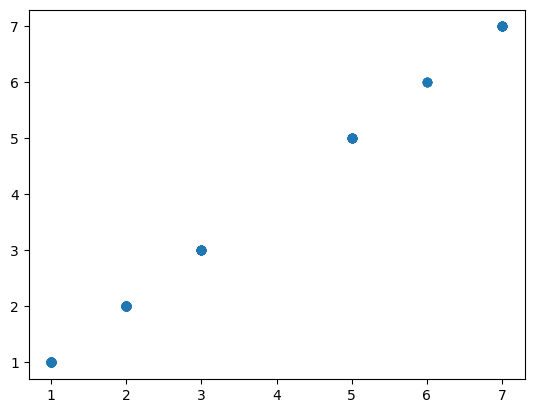

In [45]:
import matplotlib.pyplot as plt
plt.scatter(ypreds_train,yactual_train)
plt.show()

In [46]:
ypreds_test = model2.predict(x_test)
ypreds_test

array([5, 2, 6, 1, 7, 2, 1, 7, 1, 1, 5, 1, 2, 7, 1, 1, 1, 2, 2, 1, 2, 5,
       2, 1, 2, 3, 1, 1, 2, 2, 2, 2, 2, 1, 7, 1, 1, 7, 7, 5, 7, 1, 5, 6,
       2, 2, 3, 7, 7, 2, 1, 2, 2, 2, 7, 1, 1, 2, 1, 1, 2, 3, 2, 1, 1],
      dtype=int64)

In [47]:
yactual_test=y_test
yactual_test

131    2
86     2
177    6
31     1
209    7
      ..
125    2
63     1
24     1
8      1
40     1
Name: Type, Length: 65, dtype: int64

In [49]:
import warnings
warnings.filterwarnings('ignore')
model2=KNeighborsClassifier(n_neighbors=1)
model2.fit(x_train,y_train)
ypreds_test = model2.predict(x_test)
accuracy_score(pred,y_test)
pd.Series(ypreds_test).value_counts()
print(classification_report(y_test,ypreds_test))

              precision    recall  f1-score   support

           1       0.78      0.78      0.78        23
           2       0.64      0.67      0.65        21
           3       0.33      0.50      0.40         2
           5       0.40      1.00      0.57         2
           6       1.00      0.40      0.57         5
           7       1.00      0.83      0.91        12

    accuracy                           0.72        65
   macro avg       0.69      0.70      0.65        65
weighted avg       0.77      0.72      0.73        65



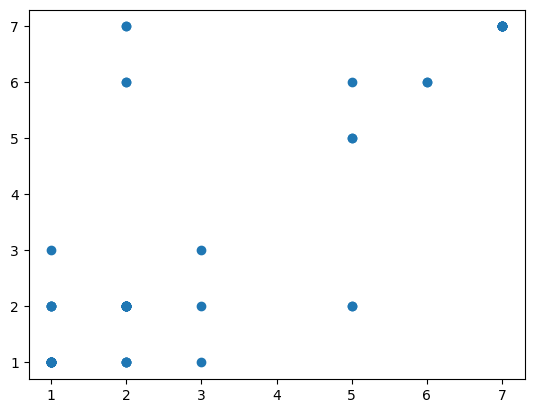

In [50]:
import matplotlib.pyplot as plt
plt.scatter(ypreds_test,yactual_test)
plt.show()